In [68]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [69]:
# Import Dataset
df = pd.read_csv('Customer-Churn.csv')

# Drop ID column
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Fill missing numeric values with median
for col in df.select_dtypes(include=['number']):
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
for col in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


C:\Users\syedn\AppData\Local\Temp\ipykernel_18568\537125692.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\syedn\AppData\Local\Temp\ipykernel_18568\537125692.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [70]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # <-- fixed leakage issue

print("Preprocessing Complete.")


Preprocessing Complete.


In [71]:
# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



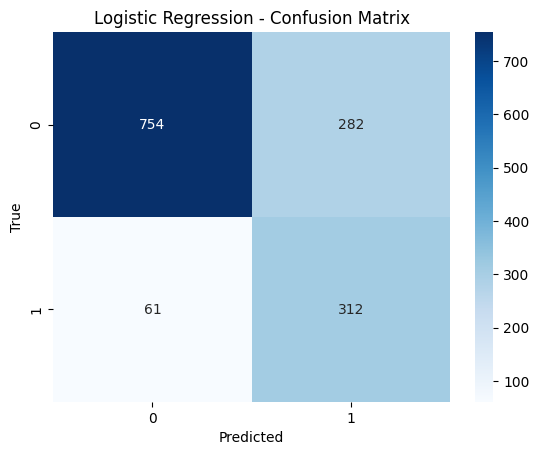


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.48      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409



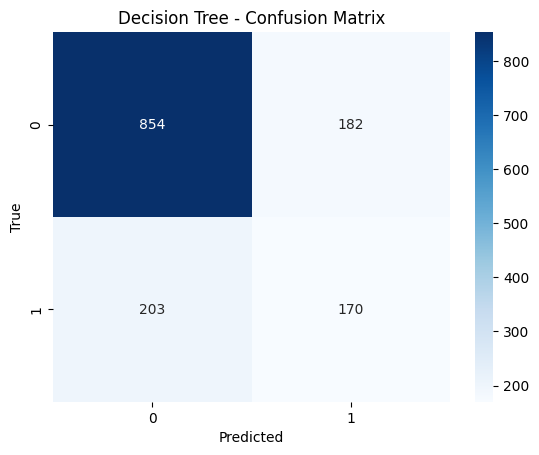


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



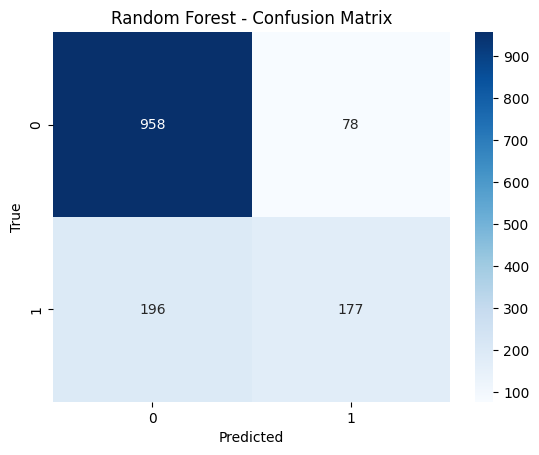

In [72]:
# Training & Evaluation Loop
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, preds)
    prc = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc_score = roc_auc_score(y_test, probs)
    
    results.append([name, acc, prc, rec, f1, auc_score])
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [73]:
# Results DataFrame
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.756565   0.525253  0.836461  0.645295  0.861228
1        Decision Tree  0.726757   0.482955  0.455764  0.468966  0.640250
2        Random Forest  0.805536   0.694118  0.474531  0.563694  0.838104


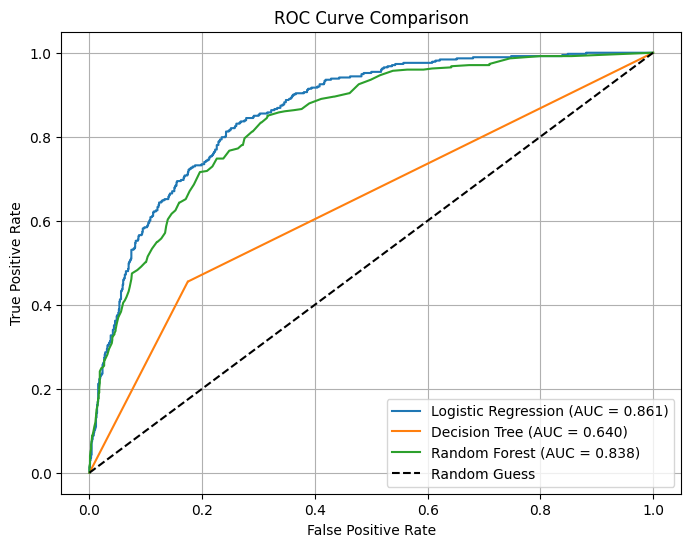

In [74]:
# ROC Curve Comparison
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


C:\Users\syedn\AppData\Local\Temp\ipykernel_18568\1697718137.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Feature', data=coef_df, palette='coolwarm')


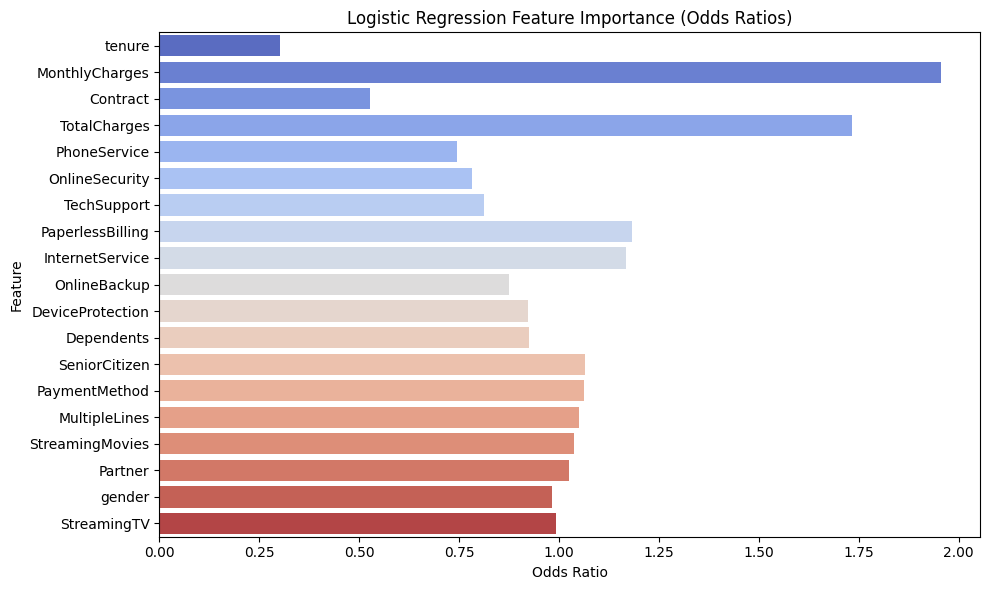

In [75]:
# Feature Importance: Logistic Regression (Coefficients)
lr_model = models['Logistic Regression']
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Odds Ratio': np.exp(lr_model.coef_[0])
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Feature Importance (Odds Ratios)')
plt.tight_layout()
plt.show()


C:\Users\syedn\AppData\Local\Temp\ipykernel_18568\3136666072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


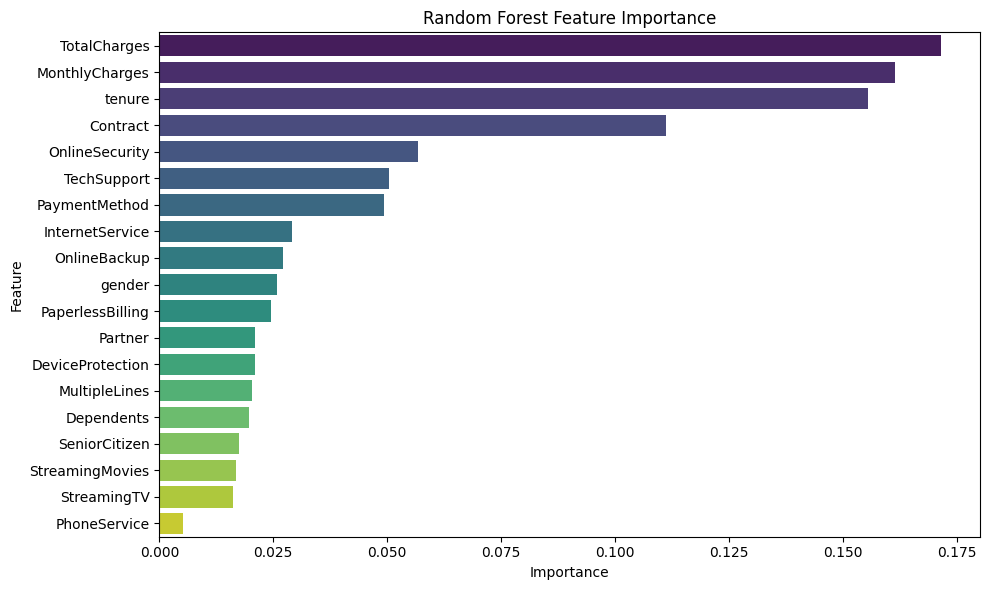

In [83]:
# Feature Importance: Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [77]:
y.value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64